In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
movie = pd.read_csv('movie-full-dataset.csv')
movie

,Unnamed: 0,title,id,popularity,vote_count,vote_average,top_casts_popularity_avg,top_crews_popularity_avg,casts_popularity_sum,crews_popularity_sum,top_cast_popularity,top_crew_popularity,budget
0,0,Avengers: Endgame,299534,355.688,17650,8.3,23.870800,2.616333,656.934,505.825,49.553,7.761,356000000.0
1,1,Avatar,19995,109.432,23115,7.5,10.457000,1.533536,96.592,716.480,11.211,4.313,237000000.0
2,2,Titanic,597,141.721,18920,7.9,8.051364,2.997000,195.755,121.917,27.013,4.313,200000000.0
3,3,Star Wars: The Force Awakens,140607,56.282,15636,7.4,7.990222,2.575783,341.934,242.998,14.324,8.688,245000000.0
4,4,Avengers: Infinity War,299536,374.917,21373,8.3,26.473667,2.235121,469.885,497.096,49.553,7.761,300000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Behind the Blue Door,425722,1.620,19,5.6,1.380000,NaN,9.116,2.400,1.380,0.600,0.0
9996,9996,Insomnia Lover,741028,0.600,0,0.0,NaN,NaN,2.653,0.600,1.453,0.600,0.0
9997,9997,The Last Waltz,13963,10.943,155,7.7,3.424000,4.680000,32.636,26.680,7.180,7.180,0.0
9998,9998,The Gigolo 2,378462,2.163,3,4.5,NaN,NaN,14.005,7.618,5.682,3.104,0.0


In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                10000 non-null  int64  
 1   title                     10000 non-null  object 
 2   id                        10000 non-null  int64  
 3   popularity                10000 non-null  float64
 4   vote_count                10000 non-null  int64  
 5   vote_average              10000 non-null  float64
 6   top_casts_popularity_avg  8792 non-null   float64
 7   top_crews_popularity_avg  7824 non-null   float64
 8   casts_popularity_sum      9937 non-null   float64
 9   crews_popularity_sum      9916 non-null   float64
 10  top_cast_popularity       9937 non-null   float64
 11  top_crew_popularity       9916 non-null   float64
 12  budget                    9991 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage: 1015.8+ KB


In [18]:
movie_clean = movie
for i in ['top_casts_popularity_avg','top_crews_popularity_avg','casts_popularity_sum','crews_popularity_sum','top_cast_popularity','top_crew_popularity','budget']:
    movie_clean = movie_clean[movie_clean[i].isnull() != True]
movie_clean_nobudget = movie_clean[movie_clean['budget'] != 0]
movie_clean

,Unnamed: 0,title,id,popularity,vote_count,vote_average,top_casts_popularity_avg,top_crews_popularity_avg,casts_popularity_sum,crews_popularity_sum,top_cast_popularity,top_crew_popularity,budget
0,0,Avengers: Endgame,299534,355.688,17650,8.3,23.870800,2.616333,656.934,505.825,49.553,7.761,356000000.0
1,1,Avatar,19995,109.432,23115,7.5,10.457000,1.533536,96.592,716.480,11.211,4.313,237000000.0
2,2,Titanic,597,141.721,18920,7.9,8.051364,2.997000,195.755,121.917,27.013,4.313,200000000.0
3,3,Star Wars: The Force Awakens,140607,56.282,15636,7.4,7.990222,2.575783,341.934,242.998,14.324,8.688,245000000.0
4,4,Avengers: Infinity War,299536,374.917,21373,8.3,26.473667,2.235121,469.885,497.096,49.553,7.761,300000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9991,Super,45132,10.385,994,6.6,9.565250,5.307667,115.966,40.096,11.967,5.959,2500000.0
9992,9992,The Poison Rose,529983,17.381,178,4.4,11.624000,1.683250,80.995,75.250,14.590,2.110,0.0
9993,9993,Wintersleepers,781,3.691,27,7.0,3.070000,1.616000,14.324,14.279,3.070,1.616,0.0
9997,9997,The Last Waltz,13963,10.943,155,7.7,3.424000,4.680000,32.636,26.680,7.180,7.180,0.0


In [19]:
movie_clean_num = movie_clean[['popularity','vote_count','vote_average','top_casts_popularity_avg','top_crews_popularity_avg','casts_popularity_sum','crews_popularity_sum','top_cast_popularity','top_crew_popularity']]
movie_clean_num

,popularity,vote_count,vote_average,top_casts_popularity_avg,top_crews_popularity_avg,casts_popularity_sum,crews_popularity_sum,top_cast_popularity,top_crew_popularity
0,355.688,17650,8.3,23.870800,2.616333,656.934,505.825,49.553,7.761
1,109.432,23115,7.5,10.457000,1.533536,96.592,716.480,11.211,4.313
2,141.721,18920,7.9,8.051364,2.997000,195.755,121.917,27.013,4.313
3,56.282,15636,7.4,7.990222,2.575783,341.934,242.998,14.324,8.688
4,374.917,21373,8.3,26.473667,2.235121,469.885,497.096,49.553,7.761
...,...,...,...,...,...,...,...,...,...
9991,10.385,994,6.6,9.565250,5.307667,115.966,40.096,11.967,5.959
9992,17.381,178,4.4,11.624000,1.683250,80.995,75.250,14.590,2.110
9993,3.691,27,7.0,3.070000,1.616000,14.324,14.279,3.070,1.616
9997,10.943,155,7.7,3.424000,4.680000,32.636,26.680,7.180,7.180


In [20]:
movie_clean_num.corr()

,popularity,vote_count,vote_average,top_casts_popularity_avg,top_crews_popularity_avg,casts_popularity_sum,crews_popularity_sum,top_cast_popularity,top_crew_popularity
popularity,1.000000,0.114392,0.058103,0.072291,0.024743,0.124672,0.118782,0.096200,0.080439
vote_count,0.114392,1.000000,0.320813,0.232362,0.105699,0.587657,0.602478,0.365515,0.299833
vote_average,0.058103,0.320813,1.000000,0.013097,0.056980,0.144784,0.121379,0.070498,0.078849
top_casts_popularity_avg,0.072291,0.232362,0.013097,1.000000,0.206549,0.404128,0.246776,0.837921,0.295683
top_crews_popularity_avg,0.024743,0.105699,0.056980,0.206549,1.000000,0.177070,0.024861,0.194849,0.702715
casts_popularity_sum,0.124672,0.587657,0.144784,0.404128,0.177070,1.000000,0.525058,0.625479,0.348870
crews_popularity_sum,0.118782,0.602478,0.121379,0.246776,0.024861,0.525058,1.000000,0.344705,0.370627
top_cast_popularity,0.096200,0.365515,0.070498,0.837921,0.194849,0.625479,0.344705,1.000000,0.338524
top_crew_popularity,0.080439,0.299833,0.078849,0.295683,0.702715,0.348870,0.370627,0.338524,1.000000


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### PREDICT RATINGS FROM OTHER VARIABLES

In [17]:
movie_train, movie_test = train_test_split(movie_clean, test_size = 0.2)

In [9]:
movie_train_predictor = movie_train[['popularity','vote_count','top_casts_popularity_avg','top_crews_popularity_avg','casts_popularity_sum','crews_popularity_sum','top_cast_popularity','top_crew_popularity']]
movie_train_response = movie_train['vote_average']
movie_test_predictor = movie_test[['popularity','vote_count','top_casts_popularity_avg','top_crews_popularity_avg','casts_popularity_sum','crews_popularity_sum','top_cast_popularity','top_crew_popularity']]
movie_test_response = movie_test['vote_average']

In [10]:
linreg = LinearRegression()
linreg.fit(movie_train_predictor,movie_train_response)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Intercept of Regression 	: b =  6.386699917548858
Coefficients of Regression 	: a =  [ 0.00023811  0.00014262 -0.01840925  0.02450623 -0.00124968 -0.00133332
  0.00742249 -0.00617853]



In [11]:
y_train = linreg.predict(movie_train_predictor)
y_test = linreg.predict(movie_test_predictor)

In [12]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(movie_train_predictor,movie_train_response))
print("Mean Squared Error (MSE) \t:", mean_squared_error(movie_train_response, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(movie_test_predictor,movie_test_response))
print("Mean Squared Error (MSE) \t:", mean_squared_error(movie_test_response, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.11822779746819156
Mean Squared Error (MSE) 	: 0.7700189789239763

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.10828339309873447
Mean Squared Error (MSE) 	: 0.8370991790360235



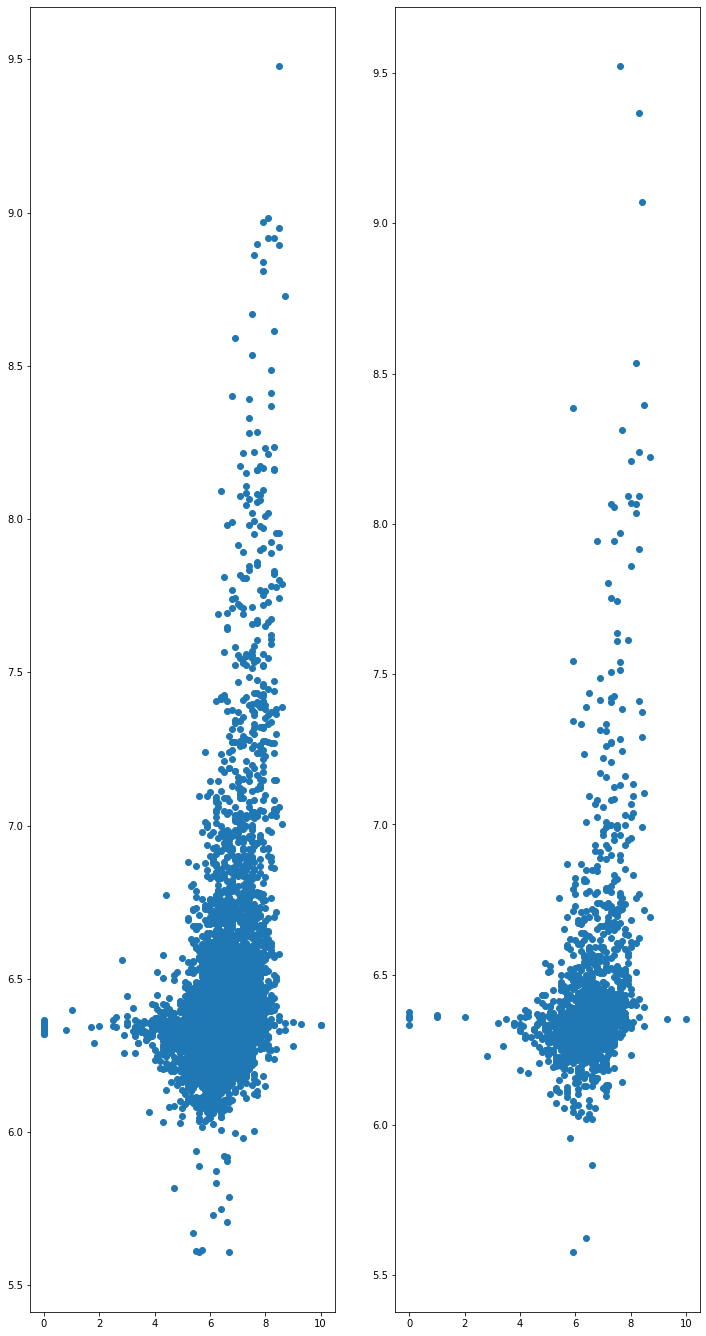

In [13]:
f, axes = plt.subplots(1,2,figsize =(12,24))
axes[0].scatter(movie_train_response,y_train)
axes[1].scatter(movie_test_response,y_test)

## BUT LOOKING AT THE TABLE AGAIN, AMOUNT OF PEOPLE VOTING HAS A QUITE STRONG RELATION WITH THE CREWS AND CASTS POPULARITY. 
## MAYBE COULD TRY ON THAT

In [34]:
movie_train, movie_test = train_test_split(movie_clean, test_size = 0.2)

In [35]:
movie_train_predictor = movie_train[['popularity','vote_average','top_casts_popularity_avg','top_crews_popularity_avg','casts_popularity_sum','crews_popularity_sum','top_cast_popularity','top_crew_popularity']]
movie_train_response = movie_train['vote_count']
movie_test_predictor = movie_test[['popularity','vote_average','top_casts_popularity_avg','top_crews_popularity_avg','casts_popularity_sum','crews_popularity_sum','top_cast_popularity','top_crew_popularity']]
movie_test_response = movie_test['vote_count']

In [36]:
linreg = LinearRegression()
linreg.fit(movie_train_predictor,movie_train_response)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Intercept of Regression 	: b =  -4963.677834335899
Coefficients of Regression 	: a =  [ 2.23492771e-01  6.51602516e+02 -9.09010064e+00  2.60902431e+01
  2.24638461e+01  1.82172098e+01  3.09367343e+00  3.85707098e-03]



In [37]:
y_train = linreg.predict(movie_train_predictor)
y_test = linreg.predict(movie_test_predictor)

In [38]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(movie_train_predictor,movie_train_response))
print("Mean Squared Error (MSE) \t:", mean_squared_error(movie_train_response, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(movie_test_predictor,movie_test_response))
print("Mean Squared Error (MSE) \t:", mean_squared_error(movie_test_response, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5110715966263892
Mean Squared Error (MSE) 	: 3523603.906927592

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5231985665856378
Mean Squared Error (MSE) 	: 3041840.2131712106



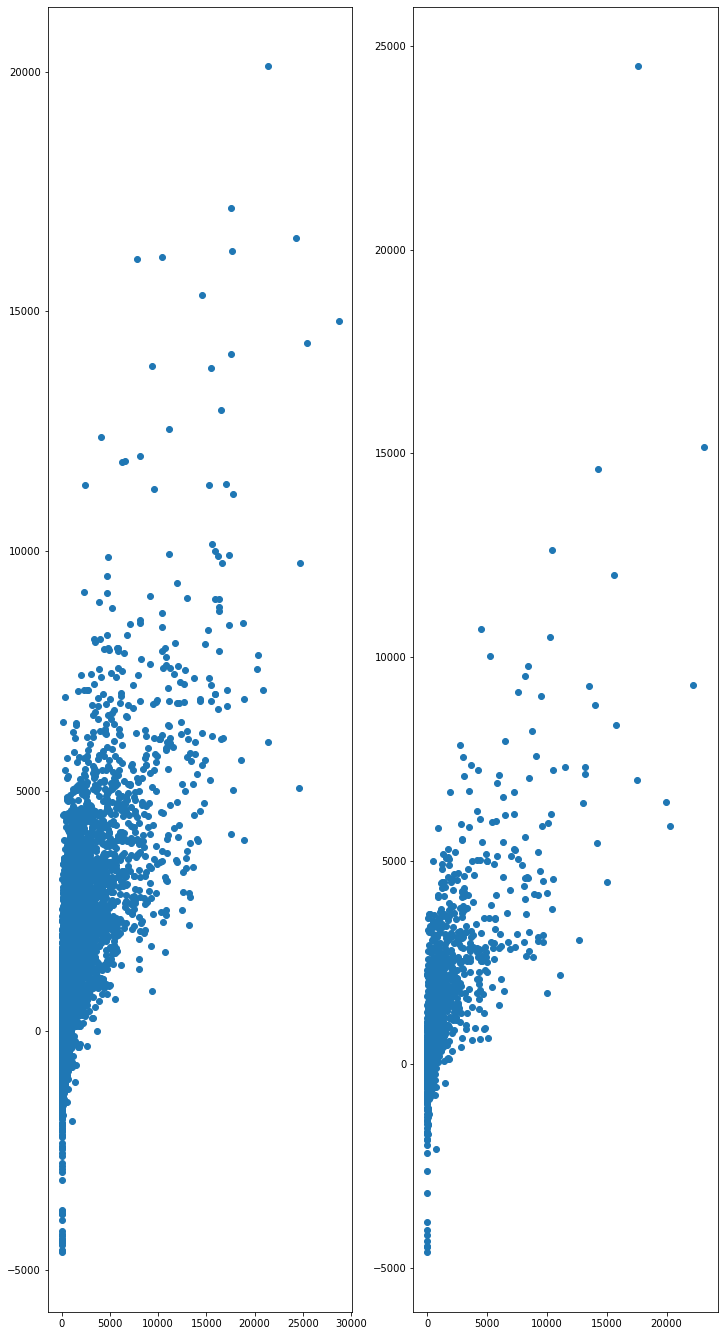

In [39]:
f, axes = plt.subplots(1,2,figsize =(12,24))
axes[0].scatter(movie_train_response,y_train)
axes[1].scatter(movie_test_response,y_test)

### TRYING SECOND VERSION ONLY WITH SUM OF CAST AND CREWS POPULARITY

In [27]:
movie_clean_num = movie_clean[['vote_count','top_casts_popularity_avg','top_crews_popularity_avg']]
movie_clean_num

,vote_count,top_casts_popularity_avg,top_crews_popularity_avg
0,17650,23.870800,2.616333
1,23115,10.457000,1.533536
2,18920,8.051364,2.997000
3,15636,7.990222,2.575783
4,21373,26.473667,2.235121
...,...,...,...
9991,994,9.565250,5.307667
9992,178,11.624000,1.683250
9993,27,3.070000,1.616000
9997,155,3.424000,4.680000


In [28]:
movie_train, movie_test = train_test_split(movie_clean, test_size = 0.2)

In [29]:
movie_train_predictor = movie_train[['casts_popularity_sum','crews_popularity_sum']]
movie_train_response = movie_train['vote_count']
movie_test_predictor = movie_test[['casts_popularity_sum','crews_popularity_sum']]
movie_test_response = movie_test['vote_count']

In [30]:
linreg = LinearRegression()
linreg.fit(movie_train_predictor,movie_train_response)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Intercept of Regression 	: b =  -813.8374468364402
Coefficients of Regression 	: a =  [22.87018667 19.12122881]



In [31]:
y_train = linreg.predict(movie_train_predictor)
y_test = linreg.predict(movie_test_predictor)

In [32]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(movie_train_predictor,movie_train_response))
print("Mean Squared Error (MSE) \t:", mean_squared_error(movie_train_response, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(movie_test_predictor,movie_test_response))
print("Mean Squared Error (MSE) \t:", mean_squared_error(movie_test_response, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4631628091891157
Mean Squared Error (MSE) 	: 3647815.8531528306

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4688348999713762
Mean Squared Error (MSE) 	: 4269586.355162934



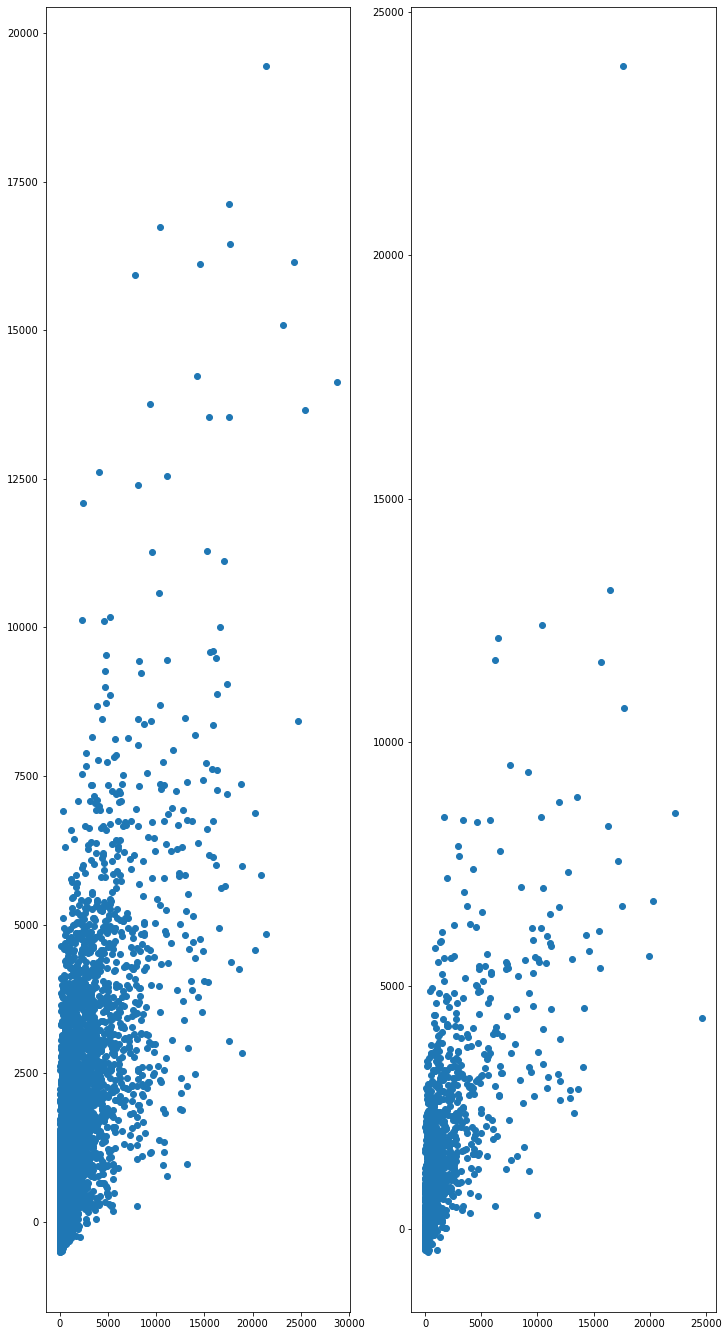

In [33]:
f, axes = plt.subplots(1,2,figsize =(12,24))
axes[0].scatter(movie_train_response,y_train)
axes[1].scatter(movie_test_response,y_test)

In [80]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 6)
moviepoly_train_predictor = poly_reg.fit_transform((movie_train_predictor))
moviepoly_test_predictor = poly_reg.fit_transform((movie_test_predictor))

pol_reg = LinearRegression()
pol_reg.fit(moviepoly_train_predictor,movie_train_response)
moviepoly_train_predictor

array([[1.00000000e+00, 5.23120000e+01, 3.66400000e+03, ...,
        1.04209069e+04, 5.33604096e+03, 2.73232774e+03],
       [1.00000000e+00, 1.48560000e+01, 1.34000000e+02, ...,
        3.27282959e+02, 6.29070899e+01, 1.20913780e+01],
       [1.00000000e+00, 1.20840000e+01, 7.30000000e+02, ...,
        1.37761750e+03, 1.82352235e+02, 2.41375690e+01],
       ...,
       [1.00000000e+00, 3.00000000e+01, 4.28600000e+03, ...,
        4.69731926e+08, 4.69731926e+08, 4.69731926e+08],
       [1.00000000e+00, 1.45740000e+01, 5.21000000e+02, ...,
        7.22962856e+04, 9.06928174e+04, 1.13770536e+05],
       [1.00000000e+00, 1.06220000e+01, 9.04000000e+02, ...,
        2.07629783e+05, 3.51276974e+04, 5.94305454e+03]])

In [81]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', pol_reg.intercept_)
print('Coefficients of Regression \t: a = ', pol_reg.coef_)
print()

Intercept of Regression 	: b =  6.354482981362121
Coefficients of Regression 	: a =  [-1.77386218e-13  1.13934667e-13 -5.59717920e-14 ...  3.34198949e-15
  1.31650208e-15 -8.98109841e-15]



In [82]:
y_poly_train = pol_reg.predict(moviepoly_train_predictor)
y_poly_test = pol_reg.predict(moviepoly_test_predictor)

In [83]:
poly_reg.fit_transform((movie_train_predictor))

array([[1.00000000e+00, 5.23120000e+01, 3.66400000e+03, ...,
        1.04209069e+04, 5.33604096e+03, 2.73232774e+03],
       [1.00000000e+00, 1.48560000e+01, 1.34000000e+02, ...,
        3.27282959e+02, 6.29070899e+01, 1.20913780e+01],
       [1.00000000e+00, 1.20840000e+01, 7.30000000e+02, ...,
        1.37761750e+03, 1.82352235e+02, 2.41375690e+01],
       ...,
       [1.00000000e+00, 3.00000000e+01, 4.28600000e+03, ...,
        4.69731926e+08, 4.69731926e+08, 4.69731926e+08],
       [1.00000000e+00, 1.45740000e+01, 5.21000000e+02, ...,
        7.22962856e+04, 9.06928174e+04, 1.13770536e+05],
       [1.00000000e+00, 1.06220000e+01, 9.04000000e+02, ...,
        2.07629783e+05, 3.51276974e+04, 5.94305454e+03]])

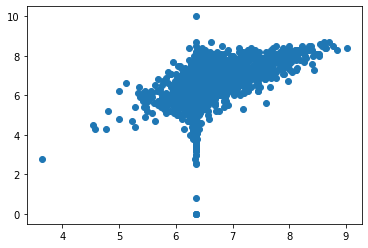

In [84]:
plt.scatter(y_poly_train, movie_train_response)

In [85]:
from sklearn.metrics import r2_score
r2_deg2 = r2_score(movie_train_response, y_poly_train) 
r2_deg2

0.20051643944500042